<a href="https://colab.research.google.com/github/githubpradeep/notebooks/blob/main/CartoonSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/CartoonSegmentation/CartoonSegmentation
%cd CartoonSegmentation
!pip install -U openmim
!mim install mmcv mmdet mmengine
!pip install -r requirements.txt

In [ ]:
#RESTART SESSION

In [ ]:
%cd CartoonSegmentation

In [1]:
!mkdir models
!git clone https://huggingface.co/dreMaz/AnimeInstanceSegmentation models/AnimeInstanceSegmentation

Cloning into 'models/AnimeInstanceSegmentation'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 34 (delta 8), reused 0 (delta 0), pack-reused 19
Unpacking objects: 100% (34/34), 4.69 KiB | 369.00 KiB/s, done.
Filtering content: 100% (7/7), 2.08 GiB | 49.57 MiB/s, done.


In [3]:
!wget -O girl.png https://assets.st-note.com/img/1704404934968-U4cDengKPp.png?width=2000&height=2000&fit=bounds&quality=85

--2024-01-08 13:24:01--  https://assets.st-note.com/img/1704404934968-U4cDengKPp.png?width=2000
Resolving assets.st-note.com (assets.st-note.com)... 199.232.210.133, 199.232.214.133
Connecting to assets.st-note.com (assets.st-note.com)|199.232.210.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1302498 (1.2M) [image/png]
Saving to: ‘girl.png’

girl.png            100%[===================>]   1.24M  --.-KB/s    in 0.06s   

2024-01-08 13:24:02 (21.2 MB/s) - ‘girl.png’ saved [1302498/1302498]



In [5]:
!mv girl.png examples

In [6]:
from PIL import Image

In [8]:
import matplotlib.pyplot as plt

In [18]:
img = Image.open('examples/girl.png')

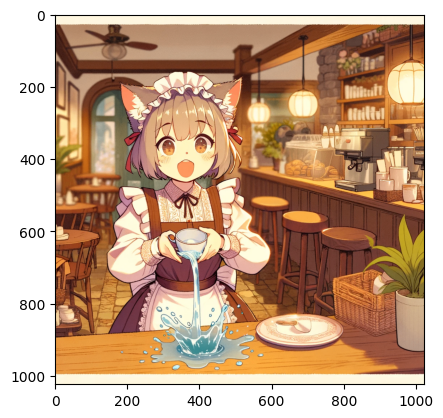

In [19]:
plt.imshow(img)

/content/CartoonSegmentation


In [16]:
import cv2
from PIL import Image
import numpy as np
from animeinsseg import AnimeInsSeg, AnimeInstances
from animeinsseg.anime_instances import get_color


mask_thres = 0.3
instance_thres = 0.3
refine_kwargs = {'refine_method': 'refinenet_isnet'}
# refine_kwargs = None


imgp = 'examples/girl.png'
img = cv2.imread(imgp)


ckpt = r'models/AnimeInstanceSegmentation/rtmdetl_e60.ckpt'
net = AnimeInsSeg(ckpt, mask_thr=mask_thres, refine_kwargs=refine_kwargs)


instances: AnimeInstances = net.infer(
    img,
    output_type='numpy',
    pred_score_thr=instance_thres
)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


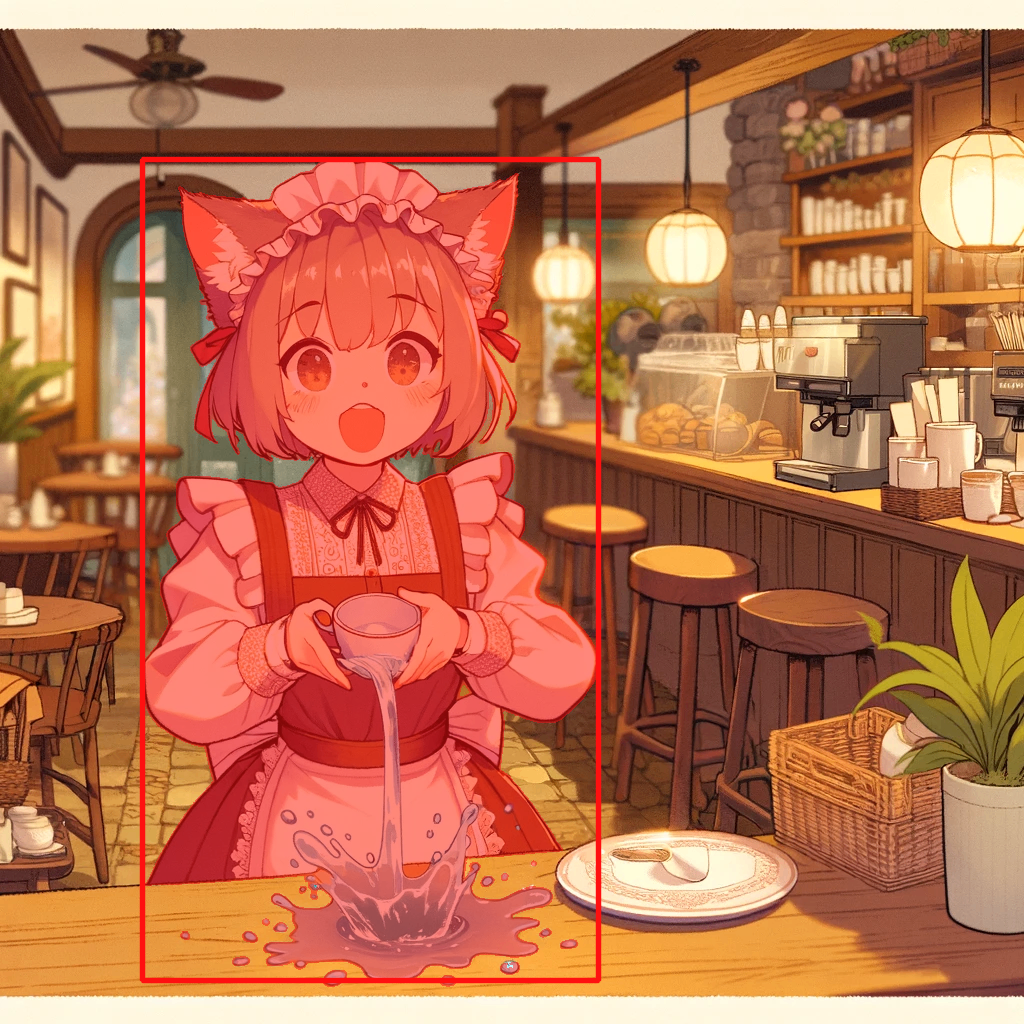

In [17]:
drawed = img.copy()
im_h, im_w = img.shape[:2]


for ii, (xywh, mask) in enumerate(zip(instances.bboxes, instances.masks)):
    color = get_color(ii)
    mask_alpha = 0.5
    linewidth = max(round(sum(img.shape) / 2 * 0.003), 2)

    p1, p2 = (int(xywh[0]), int(xywh[1])), (int(xywh[2] + xywh[0]), int(xywh[3] + xywh[1]))
    cv2.rectangle(drawed, p1, p2, color, thickness=linewidth, lineType=cv2.LINE_AA)

    p = mask.astype(np.float32)
    blend_mask = np.full((im_h, im_w, 3), color, dtype=np.float32)
    alpha_msk = (mask_alpha * p)[..., None]
    alpha_ori = 1 - alpha_msk
    drawed = drawed * alpha_ori + alpha_msk * blend_mask

drawed = drawed.astype(np.uint8)
Image.fromarray(drawed[..., ::-1])